In [1]:
"""#1 가중치와 편향을 초기화해서 저장"""
import numpy as np

# numpy 임의성 조절
np.random.seed(42)

def initialize_parameters(neurons_per_layer):
    """신경망의 가중치와 편향을 초기화해주는 함수"""
    L = len(neurons_per_layer)- 1  # 층 개수 저장
    parameters = {}
    
        # 1층 부터 L층까지 돌면서 가중치와 편향 초기화
        #이때 가중치의 2차원배열 행-열 관계 순서가 일반적인 경우와 반대임--추후에 계산을 편하게 하기 위함
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(neurons_per_layer[l],neurons_per_layer[l-1])*(np.sqrt(neurons_per_layer[l])**-1)
        parameters['b' + str(l)] = [i*(np.sqrt(neurons_per_layer[l])**-1) for i in np.random.randn(neurons_per_layer[l])]        
    
    return parameters

# 실행 코드
# 각 층별 뉴런의 개수가 저장되어 있는 리스트 neurons_per_layer
neurons_per_layer = [10, 5, 5, 3]
initialize_parameters(neurons_per_layer)

{'W1': array([[ 0.22213732, -0.06183368,  0.28965512,  0.68111966, -0.10471657,
         -0.10470923,  0.70624544,  0.34320724, -0.20995533,  0.24264023],
        [-0.20724669, -0.20828068,  0.10820882, -0.85564494, -0.77140671,
         -0.25146263, -0.45295185,  0.14053568, -0.40608071, -0.63160142],
        [ 0.65545806, -0.10097023,  0.03019953, -0.63716676, -0.24345536,
          0.04960609, -0.51473998,  0.16801726, -0.26861379, -0.13044941],
        [-0.26909138,  0.82836399, -0.00603614, -0.47302271,  0.36785327,
         -0.54597788,  0.09340664, -0.87639112, -0.59398286,  0.08803902],
        [ 0.33025229,  0.07663823, -0.05171948, -0.13465767, -0.66121514,
         -0.32192412, -0.20600392,  0.47275943,  0.15367077, -0.78845553]]),
 'b1': [0.1449347571969446,
  -0.17221403118830395,
  -0.3027287216298514,
  0.27354995241459534,
  0.461077003414154],
 'W2': array([[ 0.41648113, -0.37530949, -0.13828398,  0.14814551,  0.43627704],
        [-0.21429323, -0.08302922, -0.49476804

In [9]:
"""#2 순전파(feed forward) 구현해보기"""
# 인공 신경망 구현에 사용할 라이브러리 임포트
import numpy as np
import pandas as pd

# numpy 임의성 조절
np.random.seed(42)

# 데이터 셋 가지고 오기
dataset = pd.read_csv('C:/Users/공성식/Desktop/WORKSTATION/Python Workplace/codeit/deep_learning/5fd21438168b2559ed22ef4e_4007/4007/data/MNIST_preprocessed.csv', sep=',', header=None).values

# 입력, 목표 변수 데이터 셋 나누기
X = dataset[:, 0:784]
Y = dataset[:, 784:]

# training, testing 데이터 셋 나누기
X_train, X_test = X[0:250,], X[250:,]
Y_train, Y_test = Y[0:250,], Y[250:,]

def sigmoid(x):
    """시그모이드 함수"""
    return 1/(1 + np.exp(-x))

def initialize_parameters(nodes_per_layer):
    """신경망의 가중치와 편향을 초기화해주는 함수"""
    L = len(nodes_per_layer) - 1  # 층 개수 저장
    parameters = {}  
    
    # 1층 부터 L 층까지 돌면서 가중치와 편향 초기화
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(nodes_per_layer[l], nodes_per_layer[l-1]) * np.sqrt(1. / nodes_per_layer[l])
        parameters['b' + str(l)] = np.random.randn(nodes_per_layer[l]) * np.sqrt(1. / nodes_per_layer[l])
        
    return parameters

def feed_forward(x, parameters):
    """순전파 함수"""
    cache = {'a0': x}  # 0 번째 층 출력 저장
    L = len(parameters) // 2  # 층 수 저장
    
    for l in range(1, L+1):
        # 전 층 뉴런의 출력, 현재 층 뉴런들의 가중치, 편향 데이터를 가지고 온다.
        a_prev = cache['a'+str(l-1)]
        W = parameters['W'+str(l)]
        b = parameters['b'+str(l)]
        
        # 가지고 온 데이터로 z와 a를 계산한다.
        """numpy 배열끼리의 연산임을 지각하자"""
        z = np.dot(W,a_prev)+b
        a = sigmoid(z)

        # 결과 값을 캐시에 저장한다.
        cache['z' + str(l)] = z
        cache['a' + str(l)] = a
                
    return a, cache

# 실행 코드
neurons_per_layer = [784, 128, 64, 10]
parameters = initialize_parameters(neurons_per_layer)
feed_forward(X_train[0], parameters)[0]



array([0.39847348, 0.63079802, 0.79832892, 0.93056447, 0.67941405,
       0.67578969, 0.05318435, 0.37468117, 0.12677036, 0.6419338 ])

1번째 경사 하강, 테스트 셋에서 성능: 0.16
2번째 경사 하강, 테스트 셋에서 성능: 0.18
3번째 경사 하강, 테스트 셋에서 성능: 0.36
4번째 경사 하강, 테스트 셋에서 성능: 0.54
5번째 경사 하강, 테스트 셋에서 성능: 0.64
6번째 경사 하강, 테스트 셋에서 성능: 0.64
7번째 경사 하강, 테스트 셋에서 성능: 0.64
8번째 경사 하강, 테스트 셋에서 성능: 0.68
9번째 경사 하강, 테스트 셋에서 성능: 0.68
10번째 경사 하강, 테스트 셋에서 성능: 0.7
11번째 경사 하강, 테스트 셋에서 성능: 0.7
12번째 경사 하강, 테스트 셋에서 성능: 0.7
13번째 경사 하강, 테스트 셋에서 성능: 0.7
14번째 경사 하강, 테스트 셋에서 성능: 0.7
15번째 경사 하강, 테스트 셋에서 성능: 0.76
16번째 경사 하강, 테스트 셋에서 성능: 0.76
17번째 경사 하강, 테스트 셋에서 성능: 0.78
18번째 경사 하강, 테스트 셋에서 성능: 0.8
19번째 경사 하강, 테스트 셋에서 성능: 0.8
20번째 경사 하강, 테스트 셋에서 성능: 0.8
21번째 경사 하강, 테스트 셋에서 성능: 0.8
22번째 경사 하강, 테스트 셋에서 성능: 0.8
23번째 경사 하강, 테스트 셋에서 성능: 0.8
24번째 경사 하강, 테스트 셋에서 성능: 0.8
25번째 경사 하강, 테스트 셋에서 성능: 0.8


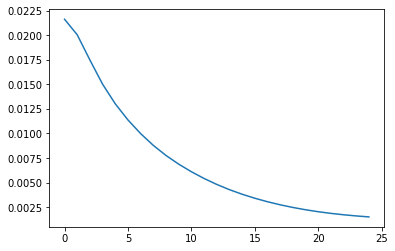

In [13]:
"""#3 역전파까지 구현해 보기"""

# 인공 신경망 구현에 사용할 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# numpy 임의성 조절
np.random.seed(42)

# 데이터 셋 가지고 오기
dataset = pd.read_csv('C:/Users/공성식/Desktop/WORKSTATION/Python Workplace/codeit/deep_learning/5fd21438168b2559ed22ef4e_4007/4007/data/MNIST_preprocessed.csv', sep=',', header=None).values
# 입력, 목표 변수 데이터 셋 나누기
X = dataset[:, 0:784]
Y = dataset[:, 784:]

# training, testing 데이터 셋 나누기
X_train, X_test = X[0:250,], X[250:,]
Y_train, Y_test = Y[0:250,], Y[250:,]

def sigmoid(x):
    """시그모이드 함수"""
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    """시그모이드 미분 함수"""
    return (np.exp(-x))/((np.exp(-x)+1)**2)

def initialize_parameters(neurons_per_layer):
    """신경망의 가중치와 편향을 초기화해주는 함수"""
    L = len(neurons_per_layer) - 1  # 입력층을 포함함 층 개수 저장
    parameters = {}
    
    # 1층 부터 L 층까지 돌면서 가중치와 편향 초기화
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(neurons_per_layer[l], neurons_per_layer[l-1]) * np.sqrt(1. / neurons_per_layer[l])
        parameters['b' + str(l)] = np.random.randn(neurons_per_layer[l]) * np.sqrt(1. / neurons_per_layer[l])
        
    return parameters

def feed_forward(x, parameters):
    """순전파 함수"""
    cache = {'a0': x}
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        # 전 층 뉴런의 출력, 현재 층 뉴런들의 가중치, 편향 데이터를 가지고 온다.
        a_prev = cache['a' + str(l-1)]
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        
        # 데이터로 z와 a를 계산한다.
        z = W @ a_prev + b
        a = sigmoid(z)

        # 결과 값을 캐쉬에 저장한다.
        cache['z' + str(l)] = z
        cache['a' + str(l)] = a
                
    return a, cache

def compute_accuracy(x_val, y_val, parameters):
    """테스트 데이터에서 예측값들의 성능을 계산하는 함수"""
    predictions = []

    for x, y in zip(x_val, y_val):
        output, _ = feed_forward(x, parameters)
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(y))

    return np.mean(predictions)

def compute_loss(x_val, y_val, parameters):
    """학습 데이터에서 현재 모델의 손실을 계산하는 함수"""
    loss = 0
    
    for x, y in zip(x_val, y_val):
        output, _ = feed_forward(x, parameters)
        loss += np.mean(0.5 * (output - y)**2) / 2
        
    return loss / len(x_val)

def back_prop(prediction, y, cache, parameters):
    """역전파 함수"""
    gradients = {}
    L = len(cache) // 2
    da = (prediction - y) / y.shape[0]
    
    for layer in range(L, 0, -1):
        db = d_sigmoid(cache[f'z{layer}']) * da
        dW = np.outer(db, cache[f'a{layer-1}'])
        da = parameters[f'W{layer}'].T @ db
        # 역전파 행렬 연산을 사용해서 각 요소에 대한 편미분 계산
        # 코드를 쓰세요

        
        # 계산한 편미분 값들을 저장
        gradients['dW' + str(layer)] = dW
        gradients['db' + str(layer)] = db
    
    # 계산한 편미분 값들 리턴
    return gradients

def update(parameters, gradients, alpha, m):
    """계산한 경사로 가중치와 편향을 업데이트 하는 함수"""
    L = len(parameters) // 2
    
    for layer in range(1, L+1):
        parameters['W'+str(layer)] -= alpha * gradients['dW'+str(layer)] / m
        parameters['b'+str(layer)] -= alpha * gradients['db'+str(layer)] / m
    
    return parameters

def train_nn(X_train, Y_train, X_test, Y_test, neurons_per_layer, epoch, alpha):
    """신경망을 학습시키는 함수"""
    parameters = initialize_parameters(neurons_per_layer)
    loss_list = []
    m = X_train.shape[0]
    
    # epoch 번 경사 하강을 한다
    for i in range(epoch):
        parameters_copy = parameters.copy()
        
        # 모든 이미지에 대해서 경사 계산 후 평균 계산
        for x, y in zip(X_train, Y_train):
            prediction, cache = feed_forward(x, parameters)
            gradients = back_prop(prediction, y, cache, parameters)
            parameters_copy = update(parameters_copy, gradients, alpha, m)
        
        # 가중치와 편향 실제로 업데이트
        parameters = parameters_copy
        loss_list.append(compute_loss(X_train, Y_train, parameters))
        print('{}번째 경사 하강, 테스트 셋에서 성능: {}'.format(i+1, round(compute_accuracy(X_test, Y_test, parameters), 2)))     
            
    return loss_list, parameters




# 실행 코드
neurons_per_layer = [784, 128, 64, 10]
parameters = initialize_parameters(neurons_per_layer)

loss_list, parameters = train_nn(X_train, Y_train, X_test, Y_test, neurons_per_layer, 25, 300)

#시각화
plt.plot(loss_list)
plt.show()